# 0. Train Test Val Split

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_3(train_clahe_swt_augmented)"
output = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_4" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.80, .20, .0))  #train val test

Copying files: 384 files [00:33, 11.34 files/s]


# 1. Preprocessing and sample CLAHE & SWT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb255/sudeb_255/alzhiemer/040.bmp"

In [ ]:
import cv2
import numpy as np
import os
from numpy import min , max
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import minmax_scale
from pywt import swtn;
from  glob  import glob;
from numpy import  dstack
from matplotlib.image import imread,imsave

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt

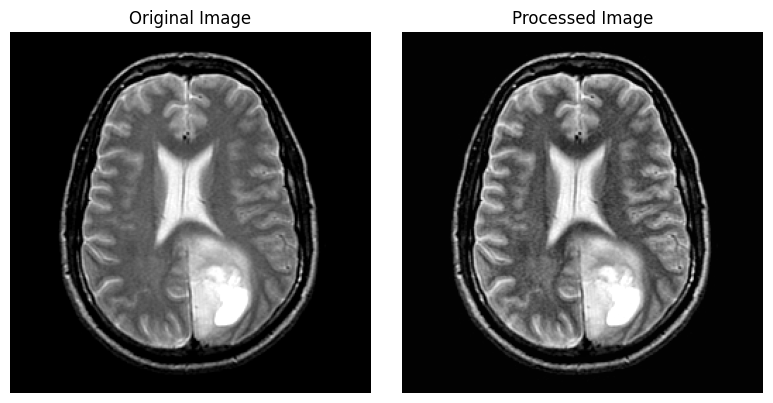

array([[0.00787402, 0.00787402, 0.00787402, ..., 0.00787402, 0.00787402,
        0.00787402],
       [0.00787402, 0.00787402, 0.00787402, ..., 0.00787402, 0.00787402,
        0.00787402],
       [0.00787402, 0.00787402, 0.00787402, ..., 0.00787402, 0.00787402,
        0.00787402],
       ...,
       [0.00787402, 0.00787402, 0.00787402, ..., 0.00787402, 0.00787402,
        0.00787402],
       [0.00787402, 0.00787402, 0.00787402, ..., 0.00787402, 0.00787402,
        0.00787402],
       [0.00787402, 0.00787402, 0.00787402, ..., 0.00787402, 0.00787402,
        0.00787402]])

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

def normalization(image):
    Imax = np.max(image)
    Imin = np.min(image)
    return (image - Imin) / (Imax - Imin)

# Load image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')



# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply(image)

# Apply Stationary Wavelet Transform (SWT)
level = 3
coeffs = pywt.swt2(equalized_image, 'haar', level=level)

# Reconstruct the image from modified coefficients
reconstructed_image = pywt.iswt2(coeffs, 'haar')

# Normalize image
reconstructed_image = normalization(reconstructed_image)

# Display processed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()



# Convert image to NumPy array
image_array = np.array(reconstructed_image)
image_array


# 2. CLAHE & SWT

In [ ]:
import os
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

def normalization(image):
    Imax = np.max(image)
    Imin = np.min(image)
    return (image - Imin) / (Imax - Imin)

def process_image(image_path, destination_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(image)

    # Apply Stationary Wavelet Transform (SWT)
    level = 3
    coeffs = pywt.swt2(equalized_image, 'haar', level=level)

    # Reconstruct the image from modified coefficients
    reconstructed_image = pywt.iswt2(coeffs, 'haar')

    # Normalize image
    reconstructed_image = normalization(reconstructed_image)

    # Save processed image
    cv2.imwrite(destination_path, (reconstructed_image * 255).astype(np.uint8))

# Source and destination directories
source_directory = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_1(train_test)/train/normal"
destination_directory = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_2(train_CLAHE_SWT_Normalized)/normal"

# Iterate over images in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".bmp"):
        # Get the full path of the source and destination images
        source_image_path = os.path.join(source_directory, filename)
        destination_image_path = os.path.join(destination_directory, filename)

        # Process the image and save it to the destination directory
        process_image(source_image_path, destination_image_path)


# 3. Augmentation

In [ ]:
from numpy import fliplr , flipud , arange , asarray
from imutils import rotate_bound
from cv2 import imread , imwrite
from glob import glob
from scipy import ndimage

def image_affine_transform (image):
    height ,width , colors = image.shape
    transform = [[1,0,0],[0.5,1,0],[0,0,1]]
    return ndimage.affine_transform(image , transform ,offset = (0,-height//2 ,0),output_shape=(height , width+height //2 , colors))

def image_rotation(image,angle):
    rotated = rotate_bound(image, angle)
    return rotated

def h_flip(image):
    return fliplr(image)

def v_flip(image):
    return flipud(image)

images_path = '/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_2(train_CLAHE_SWT_Normalized)/normal/*.bmp'
augmented_path ='/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_3(train_clahe_swt_augmented)/normal'

images=glob(images_path);

image_count =0
for image in images:
        image_number = 0

        img=imread(image)
        for angle in arange(15,20,5):
            image_name = image.replace(".bmp","")
            img_rotate = image_rotation(img,angle)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.bmp',img_rotate)
            img_hflip = h_flip(img)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.bmp',img_hflip)
            img_aff_trans =image_affine_transform(img)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.bmp',img_aff_trans)
            image_count += 3
            print(image_count)


3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48


# 4. Feature Extraction

In [ ]:
import os
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, concatenate
from PIL import Image

# Set the source and destination directories
source_dir = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_4/train"
destination_dir = "/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160"

# Load pre-trained InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
inception_output = inception_model.output
inception_output = GlobalAveragePooling2D()(inception_output)

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_output = vgg_model.output
vgg_output = GlobalAveragePooling2D()(vgg_output)

# Combine the output from both models
combined_output = concatenate([inception_output, vgg_output])

# Create the feature extraction model
feature_model = Model(inputs=[inception_model.input, vgg_model.input], outputs=combined_output)

# Initialize a list to store the features and labels
features = []
labels = []

# Iterate through the subfolders in the source directory
for class_label, class_name in enumerate(os.listdir(source_dir)):
    subfolder_path = os.path.join(source_dir, class_name)
    if os.path.isdir(subfolder_path):
        for image_file in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_file)

            # Load the image using PIL and convert it to RGB format
            image = Image.open(image_path).convert("RGB")

            # Resize the image to (299, 299) for InceptionV3
            image_inception = image.resize((299, 299))
            image_inception_array = img_to_array(image_inception)
            image_inception_array = np.expand_dims(image_inception_array, axis=0)
            image_inception_preprocessed = inception_preprocess_input(image_inception_array.copy())

            # Resize the image to (224, 224) for VGG16
            image_vgg = image.resize((224, 224))
            image_vgg_array = img_to_array(image_vgg)
            image_vgg_array = np.expand_dims(image_vgg_array, axis=0)
            image_vgg_preprocessed = vgg_preprocess_input(image_vgg_array.copy())

            features.append(feature_model.predict([image_inception_preprocessed, image_vgg_preprocessed])[0])
            labels.append(class_label)

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Define the CSV file path
csv_file = os.path.join(destination_dir, 'features.csv')

# Write the features and labels to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Class'] + [f'Feature_{i}' for i in range(len(features[0]))])
    for i in range(len(features)):
        writer.writerow([labels[i]] + list(features[i]))

print('Feature extraction and CSV file creation completed.')


1/1 [==============================] - 0s 29ms/step
Feature extraction and CSV file creation completed.


# 5. Principal Component Analysis

In [ ]:
#MIN MAX Scaling function
def min_max_scale(X):
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 X = scaler.fit_transform(X)
 return X

In [ ]:
#Function for Principal component analysis
#95% of variance
def pca_analysis(X):
 from sklearn.decomposition import PCA
 pca = PCA(n_components = 0.95)
 pca.fit(X)
 X = pca.transform(X)
 return X

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/features.csv")

df

,Class,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_2550,Feature_2551,Feature_2552,Feature_2553,Feature_2554,Feature_2555,Feature_2556,Feature_2557,Feature_2558,Feature_2559
0,0,0.304559,0.210673,0.396266,0.218586,0.104963,0.343984,0.373148,0.101534,0.017932,...,2.587816,0.027309,0.241049,0.201141,0.000000,0.676864,0.108486,0.238157,0.123266,0.000000
1,0,0.141644,0.147686,0.590329,0.317072,0.120751,0.516151,0.360948,0.178927,0.152135,...,2.180640,0.932105,0.321081,0.000000,0.000000,1.159897,0.000000,0.000000,0.203718,0.000000
2,0,0.188355,0.213952,0.525123,0.430237,0.121486,0.347984,0.400399,0.026184,0.421424,...,2.291722,0.000000,1.944599,0.149426,0.000000,0.332276,0.000000,0.000000,0.145868,0.000000
3,0,0.150499,0.383225,0.124788,0.364601,0.114151,0.169962,0.443049,0.226967,0.127993,...,1.469622,0.381957,0.511387,0.000000,0.032965,0.000000,0.000000,0.000000,0.500010,0.000000
4,0,0.053198,0.066273,0.640335,0.171418,0.055320,0.381779,0.407726,0.040850,0.401279,...,2.368269,0.269899,1.697182,0.000000,0.000000,0.114170,0.000000,0.000000,0.105390,0.031609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,0.352042,0.159120,0.132135,0.664999,0.050731,0.196477,0.519059,0.427510,0.112126,...,2.562794,0.518572,0.057351,0.158955,0.454967,0.065232,0.062258,1.249275,0.971766,2.465936
302,1,0.404928,0.185951,0.373645,0.724530,0.054652,0.138400,0.397234,0.251031,0.221966,...,3.176292,0.000000,0.363784,1.922075,0.361078,0.667960,0.000000,2.104291,1.649905,0.000000
303,1,0.336456,0.029073,0.523579,0.349157,0.156245,0.003363,0.301521,0.043398,0.085011,...,2.226286,0.000000,0.000000,0.000000,0.000000,0.622603,0.437579,0.159204,0.218891,0.000000
304,1,0.277604,0.089153,0.194345,0.207899,0.010076,0.063778,0.956971,0.036581,0.039488,...,2.808848,0.000000,0.252486,0.000000,0.000000,0.027436,0.000000,0.000000,0.105477,0.000000


In [ ]:
df.shape

(306, 2561)

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:, 0]
X = min_max_scale(X)
X = pca_analysis(X)
X = pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,-1.165269,5.554508,1.559390,-1.550445,-1.109801,-0.592499,0.222130,-2.191372,1.050172,2.070410,...,0.482287,0.062461,0.224707,0.041650,-0.026509,0.364671,-0.145107,0.226424,0.031824,-0.096113
1,-1.896742,4.330864,0.651394,-1.028412,-0.592068,-1.421713,-0.054079,-1.907255,0.522794,-0.192568,...,-0.165863,0.253459,-0.009009,0.558538,0.118147,0.278316,0.225274,-0.278743,-0.020934,0.050449
2,2.400756,2.092214,3.800896,0.829673,-1.272760,-3.683495,0.841991,-0.786449,0.269059,-0.491387,...,0.154896,-0.526291,0.080375,0.043039,0.095231,-0.061349,-0.328207,0.573071,-0.644332,0.267334
3,0.941088,-3.878153,0.188419,-0.738033,-0.472857,-1.889575,-0.306172,-1.721772,-1.105971,0.913454,...,0.138126,0.148571,-0.087300,-0.246821,-0.004655,0.113452,0.043292,-0.093089,-0.205831,-0.474503
4,2.892365,0.986014,2.336511,0.671285,-0.483248,-3.392360,-1.282136,0.597710,-0.415333,-1.508034,...,0.057614,0.167804,0.221637,0.121902,-0.029337,-0.188324,0.247953,-0.065804,0.159187,-0.291871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.459700,-3.077828,3.273166,-1.596967,-1.311494,0.856402,1.523933,-1.181288,-1.485169,-0.525487,...,-0.008082,-0.336630,0.139916,0.164309,-0.155698,-0.147347,0.304840,0.324736,0.188735,-0.436637
302,2.055254,-3.885367,-0.338730,-0.468497,-2.481710,0.621161,-0.511508,-0.124177,-1.245294,-0.660230,...,0.167420,0.169563,0.319720,-0.695639,-0.134736,-0.471428,-0.216932,-0.413579,0.166361,-0.032555
303,4.624748,1.900205,-0.087427,1.067905,1.269482,-0.812373,-1.966570,1.500571,0.124906,-1.954134,...,-0.247318,0.352732,0.074343,0.085469,-0.172289,-0.011699,0.197346,0.414960,0.697153,-0.399609
304,-2.169789,-1.459778,1.820391,1.835445,1.543243,1.133134,-0.869480,1.139356,-0.269446,0.869658,...,0.059345,-0.159534,-0.281484,0.274057,-0.152746,-0.036214,0.391812,0.198939,-0.076111,0.231229


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
301    1
302    1
303    1
304    1
305    1
Name: Class, Length: 306, dtype: int64

In [ ]:
# Removing extra NAN values with 0
X = X.fillna(0)

# Converting X and Y to numpy arrays
X = X.to_numpy()
Y = Y.to_numpy()

# Combining Y label and X feature array
combined_array = np.column_stack((Y, X))

# Creating a DataFrame from the combined array
df = pd.DataFrame(combined_array)

df.iloc[:, 0] = df.iloc[:, 0].astype('int64')


<ipython-input-13-f5899a9097b3>:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = df.iloc[:, 0].astype('int64')


In [ ]:
df.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
170    float64
171    float64
172    float64
173    float64
174    float64
Length: 175, dtype: object

In [ ]:
df.to_csv('/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/PCA_features.csv', index=False, header= None)
df

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0,-1.165269,5.554508,1.559390,-1.550445,-1.109801,-0.592499,0.222130,-2.191372,1.050172,...,0.482287,0.062461,0.224707,0.041650,-0.026509,0.364671,-0.145107,0.226424,0.031824,-0.096113
1,0,-1.896742,4.330864,0.651394,-1.028412,-0.592068,-1.421713,-0.054079,-1.907255,0.522794,...,-0.165863,0.253459,-0.009009,0.558538,0.118147,0.278316,0.225274,-0.278743,-0.020934,0.050449
2,0,2.400756,2.092214,3.800896,0.829673,-1.272760,-3.683495,0.841991,-0.786449,0.269059,...,0.154896,-0.526291,0.080375,0.043039,0.095231,-0.061349,-0.328207,0.573071,-0.644332,0.267334
3,0,0.941088,-3.878153,0.188419,-0.738033,-0.472857,-1.889575,-0.306172,-1.721772,-1.105971,...,0.138126,0.148571,-0.087300,-0.246821,-0.004655,0.113452,0.043292,-0.093089,-0.205831,-0.474503
4,0,2.892365,0.986014,2.336511,0.671285,-0.483248,-3.392360,-1.282136,0.597710,-0.415333,...,0.057614,0.167804,0.221637,0.121902,-0.029337,-0.188324,0.247953,-0.065804,0.159187,-0.291871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,-0.459700,-3.077828,3.273166,-1.596967,-1.311494,0.856402,1.523933,-1.181288,-1.485169,...,-0.008082,-0.336630,0.139916,0.164309,-0.155698,-0.147347,0.304840,0.324736,0.188735,-0.436637
302,1,2.055254,-3.885367,-0.338730,-0.468497,-2.481710,0.621161,-0.511508,-0.124177,-1.245294,...,0.167420,0.169563,0.319720,-0.695639,-0.134736,-0.471428,-0.216932,-0.413579,0.166361,-0.032555
303,1,4.624748,1.900205,-0.087427,1.067905,1.269482,-0.812373,-1.966570,1.500571,0.124906,...,-0.247318,0.352732,0.074343,0.085469,-0.172289,-0.011699,0.197346,0.414960,0.697153,-0.399609
304,1,-2.169789,-1.459778,1.820391,1.835445,1.543243,1.133134,-0.869480,1.139356,-0.269446,...,0.059345,-0.159534,-0.281484,0.274057,-0.152746,-0.036214,0.391812,0.198939,-0.076111,0.231229


# 6. Classification

In [ ]:

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def classify(path):

  X_array =[]
  Y_array= []
  Y= pd.DataFrame(Y_array)
  X = pd.DataFrame(X_array)


  chunksize = 10
  tfr = pd.read_csv(path, chunksize=chunksize, iterator=True,header= None)

  i=1
  with tfr as reader:
      for chunk in reader:
          print("index_value")
          print(i)
          X = pd.concat([X,chunk.iloc[:,1:]], axis=0, ignore_index=True)

          Y = pd.concat([Y,chunk.iloc[:, 0]], axis=0, ignore_index=True)
          i=i+1


  #Cross validation to split into training and testing
  from distutils.version import LooseVersion as Version
  from sklearn import __version__ as sklearn_version
  if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
  else:
    from sklearn.model_selection import train_test_split
  print(Version(sklearn_version))
  X_train, X_test, y_train, y_test = train_test_split(
      X, Y.values.ravel(), test_size=0.3, random_state=0
  )

  import os
  print("\nAccuracies of the given dataset: "+ os.path.basename(path))

  del X
  gc.collect()
  del Y
  gc.collect()



  #1) Perceptron model


  ppn = Perceptron(eta0=0.01, random_state=0)
  ppn.fit(X_train, y_train)
  y_pred = ppn.predict(X_test)
  print('Perceptron Model: %.2f' % accuracy_score(y_test, y_pred))

  # roc curve for models
  from sklearn.calibration import CalibratedClassifierCV
  clf_isotonic = CalibratedClassifierCV(ppn, cv=10, method='isotonic')
  clf_isotonic.fit(X_train, y_train)

  pred_prob1 = clf_isotonic.predict_proba(X_test)
  #pred_prob1 = ppn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

  auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])




  #2) Logistic Regression

  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the test set result using
  # predict function under LogisticRegression
  y_pred = classifier.predict(X_test)
  print('Logistic Regression: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob2 = classifier.predict_proba(X_test)
  fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
  auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])






  #3) Support Vector Machines

  svclassifier = SVC(kernel='linear', probability=True)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  print('Support Vector Machine: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob3 = svclassifier.predict_proba(X_test)
  fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
  auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])





  #4) Naive Bayes Classifier

  #Build a Gaussian Classifier
  model = GaussianNB()
  #Model training
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Naive Bayes: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob4 = model.predict_proba(X_test)
  fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
  auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


  #5) Decesion Tree Classifier
  #Load libraries

  #Create Decision Tree classifer object
  clf = DecisionTreeClassifier()
  #Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print('Decision Tree : %.2f' % accuracy_score(y_test, y_pred))

  pred_prob5 = clf.predict_proba(X_test)
  fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
  auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

  #6)Random Forest Classifier
  #importing random forest classifier from assemble module

  # creating a RF classifier
  clf = RandomForestClassifier(n_estimators = 100)
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
  clf.fit(X_train, y_train)
  # performing predictions on the test dataset
  y_pred = clf.predict(X_test)
  print('Random Forest: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob6 = clf.predict_proba(X_test)
  fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
  auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])



  #7) KNN Classifier
  knn = KNeighborsClassifier(n_neighbors = 15) #Total samples 2958*0.7. square root of 2958*0.7 is 38.0712
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  #performing predictions on the test dataset
  print('KNN Classifier: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob7 = knn.predict_proba(X_test)
  fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
  auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  # auc scores
   # matplotlib
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
# plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Perceptron Model')
  plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='KNN Classifier')
  plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Support Vector Machine')
  plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Naive Bayes')
  plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Decision Tree ')
  plt.plot(fpr6, tpr6, linestyle='--',color='indigo', label='Random Forest')
  plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')

  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
   # title
  plt.title('ROC curve')
  #   x label
  plt.xlabel('False Positive Rate')
   # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();


  print("AUC Scores: Sudeb 160")
  print('Peceptron AUC Score : %.2f' % auc_score1)
  print('Logistic Regression AUC Score : %.2f' % auc_score2)
  print('SVM AUC Score : %.2f' % auc_score3)
  print('Naive Bayes AUC Score : %.2f' % auc_score4)
  print('Decision Tree AUC Score : %.2f' % auc_score5)
  print('Random Forest AUC Score : %.2f' % auc_score6)
  print('KNN AUC Score : %.2f' % auc_score7)



index_value
1
index_value
2
index_value
3
index_value
4
index_value
5
index_value
6
index_value
7
index_value
8
index_value
9
index_value
10
index_value
11
index_value
12
index_value
13
index_value
14
index_value
15
index_value
16
index_value
17
index_value
18
index_value
19
index_value
20
index_value
21
index_value
22
index_value
23
index_value
24
index_value
25
index_value
26
index_value
27
index_value
28
index_value
29
index_value
30
index_value
31
1.2.2

Accuracies of the given dataset: PCA_features.csv


<ipython-input-17-39a1dbf64c88>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-17-39a1dbf64c88>:30: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


Perceptron Model: 0.93
Logistic Regression: 0.97
Support Vector Machine: 0.98
Naive Bayes: 0.90
Decision Tree : 0.87
Random Forest: 0.85
KNN Classifier: 0.85


<ipython-input-17-39a1dbf64c88>:164: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


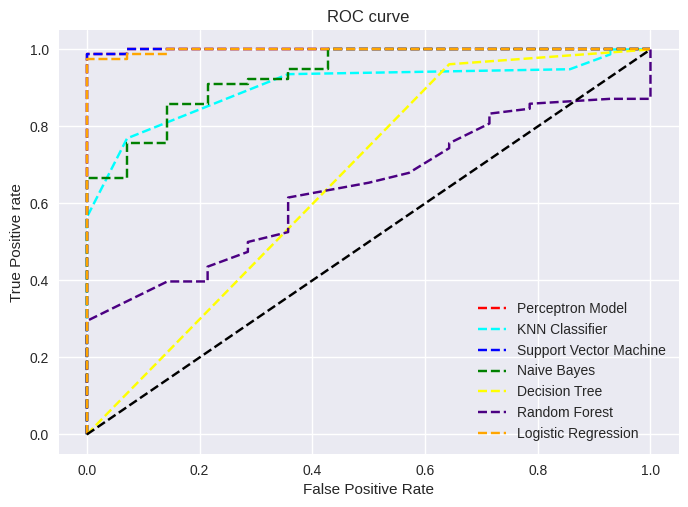

AUC Scores: Sudeb 160
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 0.93
Decision Tree AUC Score : 0.66
Random Forest AUC Score : 0.64
KNN AUC Score : 0.90


In [ ]:
# importing or loading the  ORIGA_GRAY_XCEPTION dataset
path= '/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/PCA_features.csv'

classify(path)

index_value
1
index_value
2
index_value
3
index_value
4
index_value
5
index_value
6
index_value
7
index_value
8
index_value
9
index_value
10
index_value
11
index_value
12
index_value
13
index_value
14
index_value
15
index_value
16
index_value
17
index_value
18
index_value
19
index_value
20
index_value
21
index_value
22
index_value
23
index_value
24
index_value
25
index_value
26
index_value
27
index_value
28
index_value
29
index_value
30
index_value
31
index_value
32
index_value
33
index_value
34
index_value
35
index_value
36
index_value
37
index_value
38
index_value
39
index_value
40
index_value
41
index_value
42
index_value
43
index_value
44
index_value
45
index_value
46
index_value
47
index_value
48
index_value
49
1.2.2

Accuracies of the given dataset: PCA_features.csv


<ipython-input-17-39a1dbf64c88>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-17-39a1dbf64c88>:30: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


Perceptron Model: 0.97
Logistic Regression: 0.99
Support Vector Machine: 1.00
Naive Bayes: 0.89
Decision Tree : 0.81
Random Forest: 0.85
KNN Classifier: 0.90


<ipython-input-17-39a1dbf64c88>:164: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


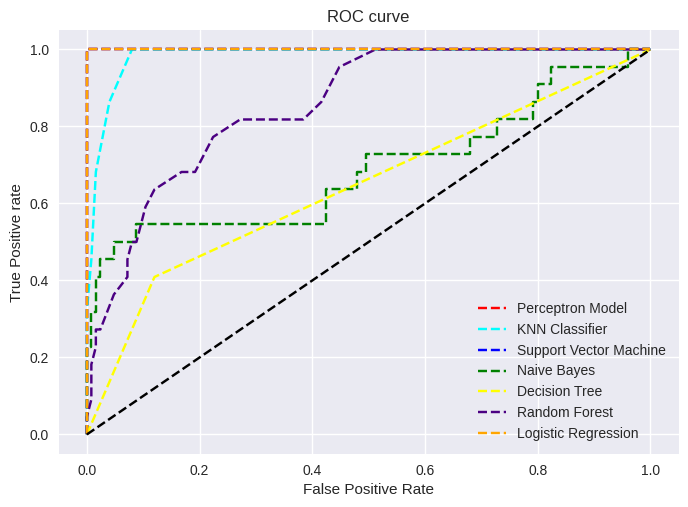

AUC Scores: Sudeb 160
Peceptron AUC Score : 1.00
Logistic Regression AUC Score : 1.00
SVM AUC Score : 1.00
Naive Bayes AUC Score : 0.69
Decision Tree AUC Score : 0.64
Random Forest AUC Score : 0.86
KNN AUC Score : 0.98


In [ ]:
# importing or loading the  ORIGA_GRAY_XCEPTION dataset
path= '/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb255/PCA_features.csv'

classify(path)